## 피마 인디언 당뇨병 예측

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [66]:
df =  pd.read_csv('data/pima-indians-diabetes.csv', skiprows=9, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 데이터 전처리

In [67]:
from sklearn.preprocessing import StandardScaler
X_scaled =  StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(
    X_scaled, df[8].values, stratify=df[8].values, test_size=0.2, random_state=seed

)

- 모델 정의/설정 학습 평가

In [69]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [70]:
model = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 20)                180       
                                                                 
 dense_46 (Dense)            (None, 8)                 168       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 357 (1.39 KB)
Trainable params: 357 (1.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Callback 사용하지 않고 실행

In [71]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2,
                epochs=200, batch_size=100, verbose=0)
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 0s/step - loss: 0.5015 - accuracy: 0.7532


[0.5014777183532715, 0.7532467246055603]

In [72]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

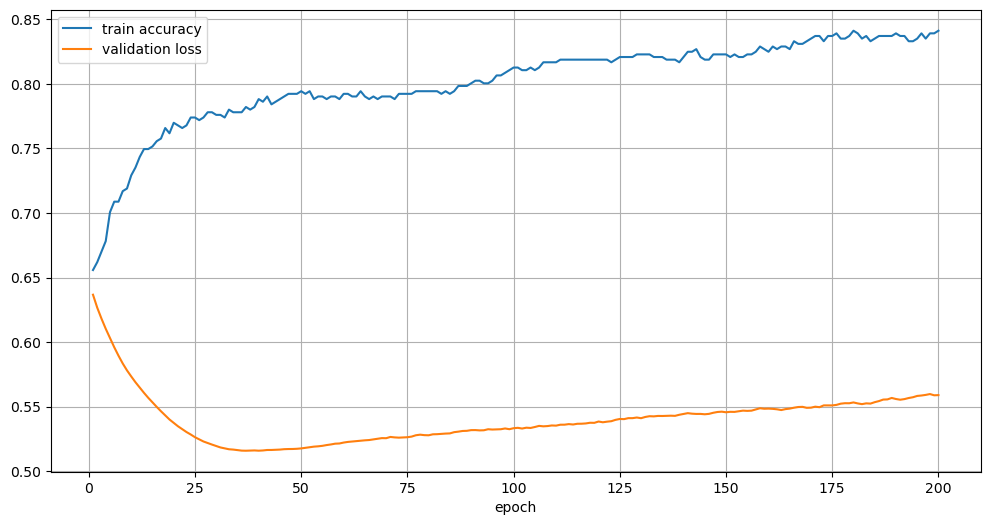

In [73]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

- callback 사용

In [74]:
"""프로그래밍에서 콜백(callback)은 다른 코드의 인수로서 넘겨주는 실행 가능한 코드를 말한다. 
콜백을 넘겨받는 코드는 이 콜백을 필요에 따라 즉시 실행할 수도 있고, 
아니면 나중에 실행할 수도 있다."""

'프로그래밍에서 콜백(callback)은 다른 코드의 인수로서 넘겨주는 실행 가능한 코드를 말한다. \n콜백을 넘겨받는 코드는 이 콜백을 필요에 따라 즉시 실행할 수도 있고, \n아니면 나중에 실행할 수도 있다.'

In [75]:
# epoch가 종료될 때 마다 callback 함수를 실행하도록 설정
model2 = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [76]:
mc = ModelCheckpoint('models/pima_best.h5', monitor='val_loss',
                     verbose=0, save_best_only=True)
# best를 찾은 뒤 10회 epoch 동안 best가 나오지 않으면, 학습을 강제 종료함
es = EarlyStopping(monitor='val_loss', patience=10) 

In [77]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                 epochs=200, batch_size=100, verbose=0,
                 callbacks=[mc, es])

c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
best_model = load_model('models/pima_best.h5')
best_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7662


[0.4891536831855774, 0.7662337422370911]

In [79]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

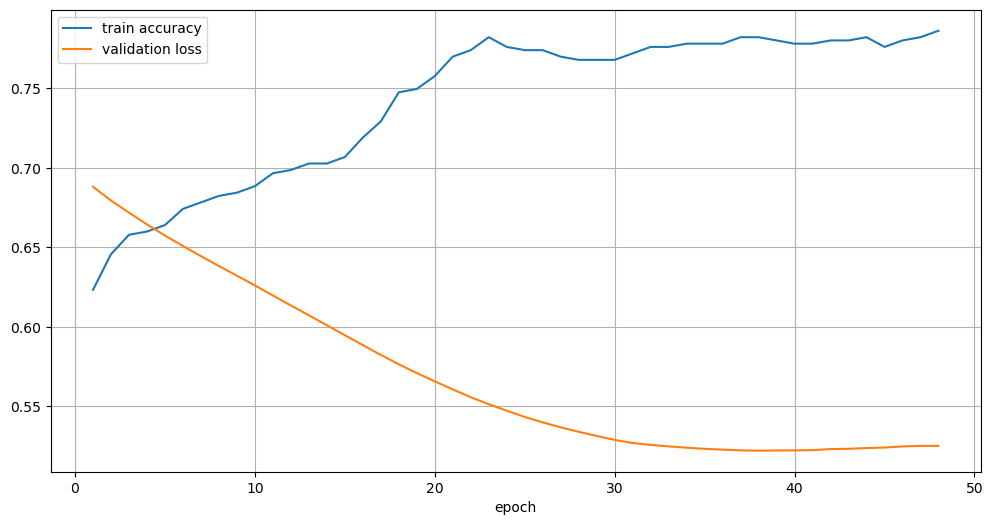

In [80]:
plt.figure(figsize=(12,6))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()